In [228]:
%%capture output
!pip install gzip
import requests
import gzip
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#MNIST URLS
urls="http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz,http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz,http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz,http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz".split(',')
urls


['http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']

In [38]:
# Download Mnist and extract

currentFolder=os.getcwd()
for url in urls:

    filename=url.split("/")[-1]
    filepath=currentFolder+"/"+filename
    if os.path.exists(filepath):
        print(f"Skip download \t{filename} exist")
    else:
        print(f"downloading {filename}")
        with requests.get(url,stream=True) as r:
            with open(filename,'wb') as f:
                shutil.copyfileobj(r.raw,f)
    
    if filepath.endswith(".gz"):
        extractFileName=filepath.split('.gz')[0].split("/")[-1]
        if os.path.exists(os.getcwd()+"/"+extractFileName)==True:
            print(f"Skip extract \t{extractFileName} exist")
        else:
            print(f"Extracting {extractFileName}")
            with gzip.open(filepath,'rb') as zip:
                with open(extractFileName,'wb') as extract:
                    shutil.copyfileobj(zip,extract)
            print("Extraction Complete")


    

Skip download 	train-images-idx3-ubyte.gz exist
Skip extract 	train-images-idx3-ubyte exist
Skip download 	train-labels-idx1-ubyte.gz exist
Skip extract 	train-labels-idx1-ubyte exist
Skip download 	t10k-images-idx3-ubyte.gz exist
Skip extract 	t10k-images-idx3-ubyte exist
Skip download 	t10k-labels-idx1-ubyte.gz exist
Skip extract 	t10k-labels-idx1-ubyte exist


In [41]:
import codecs

In [49]:
print(len("s"))

b=b'1111'
codecs.encode(b,'hex')

9


b'31313131'

In [20]:
import codecs
import numpy as np
import  matplotlib.pyplot as plt
def get_int(b,start=0,size=1):
    b=data[start:start+size]
    return int(codecs.encode(b,'hex'),16)





def readData(*args):
    for file in args:
        with open(file,'rb') as f:
            data=f.read()

        magic_number=get_int(data,0,4)
        number_of_items=get_int(data,4,4)
        if magic_number==2051:#images
            rows=get_int(data,8,4)
            cols=get_int(data,12,4)
            no_of_pixels=rows*cols
            startPixel=16
            images=np.array([[]])
            for i in range(0,number_of_items):
                offset=i*no_of_pixels+startPixel
                for j in range(0,no_of_pixels):
                    a=np.array([])
                    byteNo=j+offset
                    pixelValue=get_int(data,byteNo)
                    print(pixelValue)
                    a=np.append(a,pixelValue)
                print(a.shape)
                images=np.append(images,a)
                print(images)
                plt.imshow(images[0].reshape(rows,cols))


readData("t10k-images-idx3-ubyte")

        # if magic_number==2049:#labels



0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
84
185
159
151
60
36
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
222
254
254
254
254
241
198
198
198
198
198
198
198
198
170
52
0
0
0
0
0
0
0
0
0
0
0
0
67
114
72
114
163
227
254
225
254
254
254
250
229
254
254
140
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
17
66
14
67
67
67
59
21
236
254
106
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
83
253
209
18
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
22
233
255
83
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
129
254
238
44
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
59
249
254
62
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
133
254
187
5
0
0
0

ValueError: cannot reshape array of size 1 into shape (28,28)

In [6]:
data[n*4:(n+1)*4]

NameError: name 'n' is not defined

In [201]:
# n=n+10

a=data[n*4:(n+1)*4]
c=codecs.encode(a,'hex')
a,c ,c.decode('utf-8')

(b'\xf8\xfd\xfd\xfd', b'f8fdfdfd', 'f8fdfdfd')

In [207]:
a=data[0:4]


In [221]:
int(codecs.encode(a[:4],'hex'),16)

2051

(1080, 1920, 4)
(1080, 1920, 4)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)


(-0.5, 1919.5, 1079.5, -0.5)

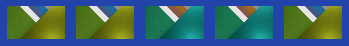

In [63]:
import cv2 
from matplotlib import image as mpimg
from matplotlib.pyplot import imread 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,5)
fig.set_facecolor('#2244AA')
file='1.png'
# print(ax[0])
img=mpimg.imread(file)
i=0
print(img.shape)
ax[i].imshow(img)
ax[i].grid(True)
ax[i].axis(False)
i=i+1
img=imread(file)
print(img.shape)
ax[1].imshow(img)
ax[i].grid(True)
ax[i].axis(False)

i=i+1
a=cv2.imread(file)

print(a.shape)
ax[i].imshow(a)
ax[i].grid(True)
ax[i].axis(False)
i=i+1
b=cv2.imread(file)
# b=cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
print(b.shape)
ax[i].imshow(b)
ax[i].grid(True)
ax[i].axis(False)

i=i+1
# b=cv2.imread(file,cv2.IMREAD_COLOR)
b=cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
print(b.shape)
ax[i].imshow(b)
ax[i].grid(True)
ax[i].axis(False)


In [17]:
dir(ax[0])

['ArtistList',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_